# Seaborn Exercises

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Use the iris database to answer the following quesitons

In [8]:
from sqlalchemy import create_engine
from env import user, password, host
url = 'mysql+pymysql://{}:{}@{}/iris_db'.format(user, password, host)
dbc = create_engine(url)

In [14]:
measurements = pd.read_sql('SELECT * FROM measurements', dbc)
species = pd.read_sql('SELECT * FROM species', dbc)

joined_iris = measurements.set_index('species_id').join(species.set_index('species_id'))
joined_iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
species_id,,,,,,
1,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
1,3,4.7,3.2,1.3,0.2,setosa
1,4,4.6,3.1,1.5,0.2,setosa
1,5,5.0,3.6,1.4,0.2,setosa
1,6,5.4,3.9,1.7,0.4,setosa
1,7,4.6,3.4,1.4,0.3,setosa
1,8,5.0,3.4,1.5,0.2,setosa
1,9,4.4,2.9,1.4,0.2,setosa


## What does the distribution of petal lengths look like?

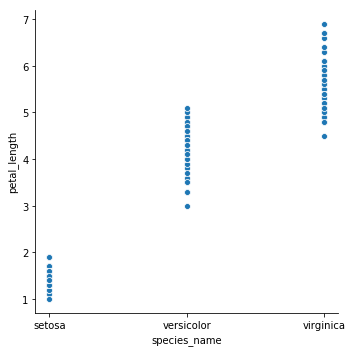

In [15]:
sns.relplot(data=joined_iris, x='species_name', y='petal_length')

## Is there a correlation between petal length and petal width?

In [16]:
joined_iris[['petal_length', 'petal_width']].corr()

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


## Would it be reasonable to predict species based on sepal width and sepal length?

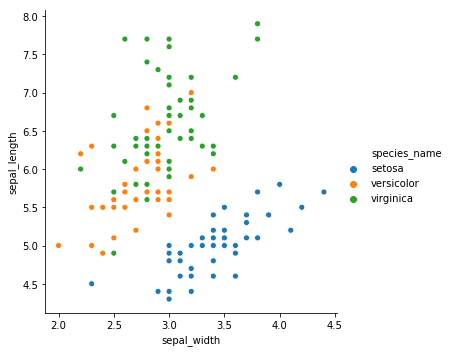

In [21]:
sns.relplot(data=joined_iris, x='sepal_width', y='sepal_length', hue='species_name')

In [22]:
#no, there is too much overlap to determine species

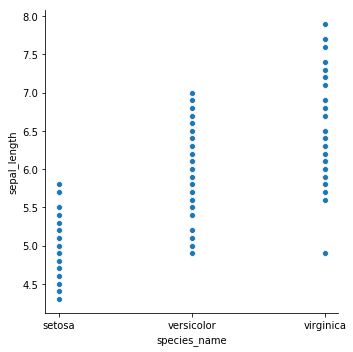

In [19]:
sns.relplot(data=joined_iris, x='species_name', y='sepal_length')

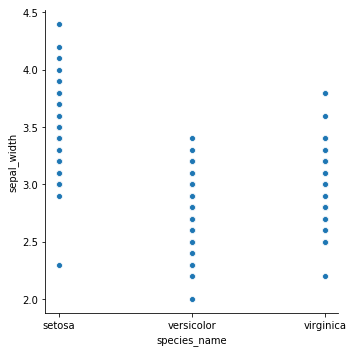

In [23]:
sns.relplot(data=joined_iris, x='species_name', y='sepal_width')

## Which features would be best used to predict species?

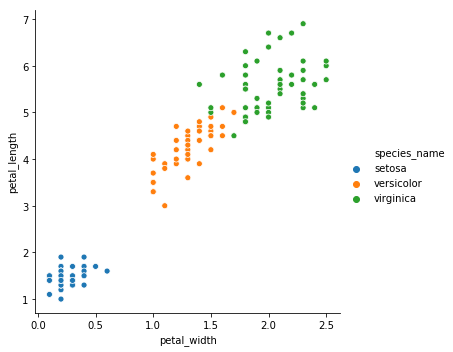

In [24]:
sns.relplot(data=joined_iris, x='petal_width', y='petal_length', hue='species_name')

In [ ]:
#petal length and petal length x width

## Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

## Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [135]:
anscombe = sns.load_dataset('anscombe')

In [149]:
anscombe[['dataset', 'x', 'y']].groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

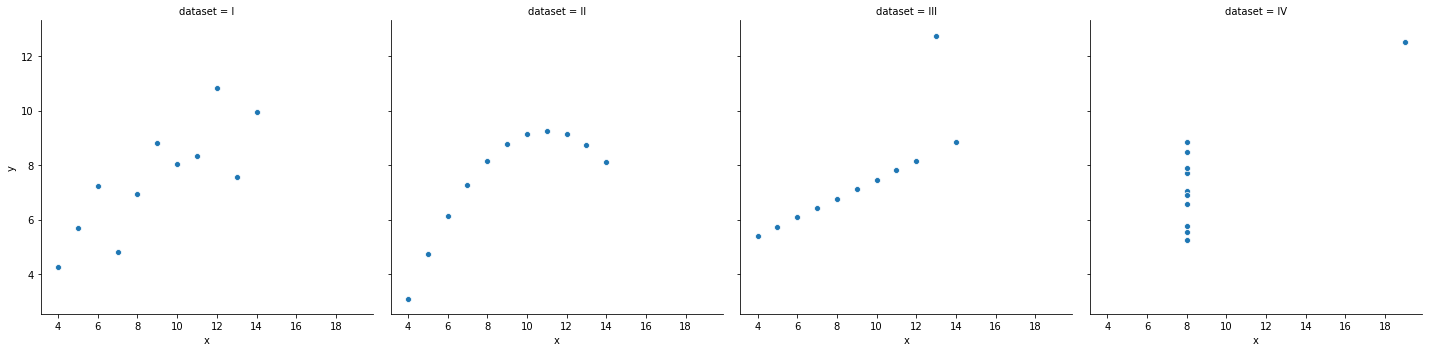

In [150]:
sns.relplot(data=anscombe, x='x', y='y', col='dataset')

## Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [46]:
from pydataset import data
insect = data('InsectSprays') 
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [47]:
insect

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


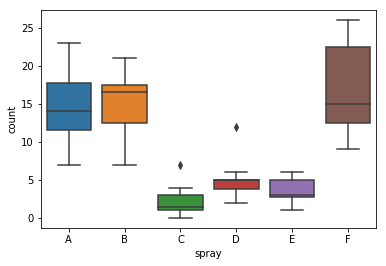

In [52]:
sns.boxplot(data=insect, y='count', x='spray')

## Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [53]:
swiss = data('swiss') 
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [54]:
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


## Create a column named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [68]:
catholic = swiss.assign(is_catholic=swiss.Catholic > 50.00)
catholic

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


## Does whether or not a province is Catholic influence fertility?

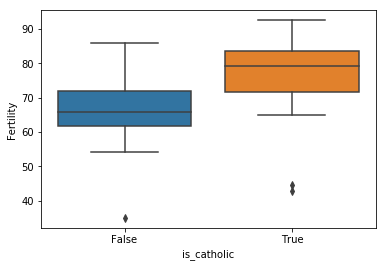

In [79]:
sns.boxplot(data=catholic, x='is_catholic', y='Fertility')

## What measure correlates most strongly with fertility?

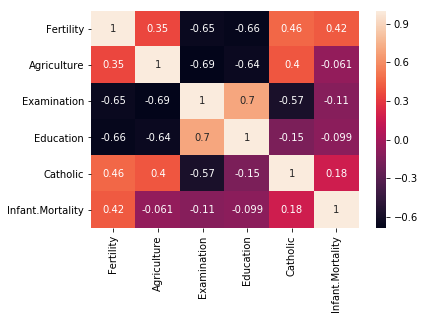

In [201]:
from matplotlib import cm #color map
sns.heatmap(swiss.corr(), annot=True)

## Using the chipotle dataset from the previous exercise, create a barplot that shows the 4 most popular items and the revenue produced by each.

In [88]:
from sqlalchemy import create_engine
from env import user, password, host
url = 'mysql+pymysql://{}:{}@{}/chipotle'.format(user, password, host)
dbc = create_engine(url)

In [89]:
chipotle = pd.read_sql('SELECT * FROM orders', dbc)

In [94]:
clean_chipotle = chipotle.item_price.replace('[\$,]', '', regex=True).astype(float)

In [95]:
chipotle.item_price = clean_chipotle

In [96]:
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
6,7,3,1,Side of Chips,nan,1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25


In [97]:
item_numbers = chipotle[['item_name', 'quantity']].groupby('item_name').sum()

In [103]:
most_popular = item_numbers.sort_values(by='quantity', ascending=False).head(4)
most_popular

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386


In [104]:
revenue = ((chipotle.quantity * chipotle.item_price)/chipotle.quantity)

chipotle['revenue'] = revenue

chipotle

,id,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39,2.39
1,2,1,1,Izze,[Clementine],3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98,10.98
6,7,3,1,Side of Chips,nan,1.69,1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",11.75,11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25,9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25,9.25


In [128]:
pop_revenue = chipotle[['item_name', 'quantity', 'revenue']].groupby('item_name', as_index=False).sum().sort_values(by='quantity', ascending=False).head(4)

In [129]:
pop_revenue

,item_name,quantity,revenue
17,Chicken Bowl,761,7342.73
18,Chicken Burrito,591,5575.82
25,Chips and Guacamole,506,2201.04
39,Steak Burrito,386,3851.43


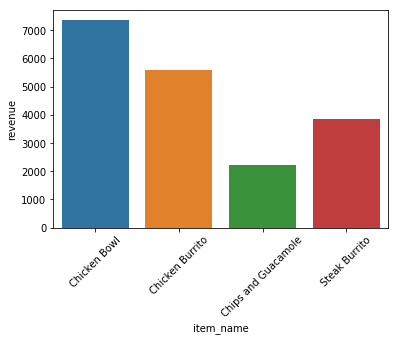

In [131]:
sns.barplot(data=pop_revenue, x="item_name", y="revenue")
plt.xticks(rotation=45)
plt.show()

## Load the sleepstudy data and read it's documentation. Use seaborn to create a line plot of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [202]:
from pydataset import data
sleep = data('sleepstudy') 
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [198]:
# sleep.Subject = sleep.Subject.astype(str)

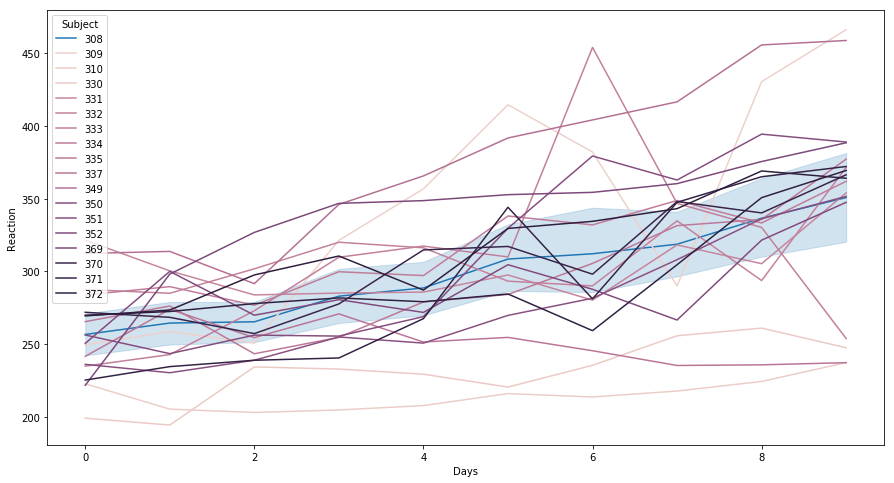

In [204]:
plt.figure(figsize=(15,8))
sns.lineplot(data=sleep, x="Days", y="Reaction")
sns.lineplot(data=sleep, x='Days', y='Reaction', hue='Subject')
plt.legend(title='Subject', loc='upper left', labels=['308', '309', '310', '330', '331', '332', '333', '334', '335', '337', '349', '350', '351', '352', '369', '370', '371', '372'])
plt.show()